![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**
  ## Solution by **Paul Martín García Morfín**
   ### A01750164 | ITESM

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1181



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto/sascfg_personal.py
WORK Path             = /saswork/SAS_work897200019B3E_odaws02-usw2-2.oda.sas.com/SAS_work592500019B3E_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 105278


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 11:18:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 11:18:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [ ]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge = data_merge.loc[(data_merge['GaveThisYear'] == 1)]
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
220553,2220554.0,NANDURI,DANNIELLE,1.0,22.0,15700.0,University / College,Rural,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,15.0
791750,2791751.0,GORDON,ANGELA,1.0,71.0,23000.0,High School,Suburban,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,25.0


## EDA

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149457 entries, 3 to 999998
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            149457 non-null  float64
 1   LastName      149454 non-null  object 
 2   FirstName     149457 non-null  object 
 3   Woman         149457 non-null  float64
 4   Age           149457 non-null  float64
 5   Salary        149457 non-null  float64
 6   Education     149457 non-null  object 
 7   City          149457 non-null  object 
 8   SeniorList    149457 non-null  float64
 9   NbActivities  149457 non-null  float64
 10  Referrals     149457 non-null  float64
 11  Recency       68433 non-null   float64
 12  Frequency     68433 non-null   float64
 13  Seniority     68433 non-null   float64
 14  TotalGift     68433 non-null   float64
 15  MinGift       68433 non-null   float64
 16  MaxGift       68433 non-null   float64
 17  GaveLastYear  149457 non-null  float64
 18  AmtL

## Data preparation

In [ ]:
data_new = data_merge.copy()

In [ ]:
data_new.drop(["ID", "FirstName", "LastName"], axis=1, inplace=True)

In [ ]:
data_new["City"].replace(["Rural", "Downtown", "Suburban", "City"], [0, 1, 2, 3], inplace=True)
data_new["Education"].replace(["Elementary", "High School", "University / College"], [0, 1, 2], inplace=True)

## Treating Missing Values

>Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
762803,2762804.0,ZARLING,JOSEPH,0.0,61.0,38800.0,High School,Suburban,3.0,2.0,...,2.0,3.0,40.0,10.0,30.0,0.0,0.0,0.0,1.0,100.0
271150,2271151.0,CASSEDAY,ANNA,1.0,28.0,39600.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,40.0
349704,2349705.0,MAPP,LYNN,1.0,19.0,42300.0,University / College,City,10.0,6.0,...,6.0,9.0,105.0,10.0,30.0,1.0,20.0,0.0,1.0,25.0
729199,2729200.0,LEE,RONALD,0.0,21.0,9100.0,High School,City,2.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,25.0
512727,2512728.0,SCHRAG,GARY,0.0,36.0,9400.0,High School,Downtown,1.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,20.0


In [ ]:
data_new[["MinGift"]] = data_new[["MinGift"]].fillna(value=0) 
data_new[["MaxGift"]] = data_new[["MaxGift"]].fillna(value=0) 
data_new[["TotalGift"]] = data_new[["TotalGift"]].fillna(value=0) 
data_new[["Frequency"]] = data_new[["Frequency"]].fillna(value=0) 
data_new[["Recency"]] = data_new[["Recency"]].fillna(value=11) 
data_new[["Seniority"]] = data_new[["Seniority"]].fillna(value=11) 

In [ ]:
data_new.sample(5)

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
622018,1.0,64.0,57600.0,2,3,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0
231512,0.0,31.0,18800.0,1,3,7.0,1.0,3.0,3.0,2.0,6.0,95.0,20.0,75.0,0.0,0.0,0.0,1.0,10.0
927193,0.0,25.0,25400.0,2,3,10.0,3.0,2.0,1.0,2.0,3.0,200.0,100.0,100.0,0.0,0.0,0.0,1.0,75.0
921250,1.0,34.0,210300.0,2,3,6.0,2.0,0.0,1.0,2.0,2.0,280.0,30.0,250.0,0.0,0.0,0.0,1.0,20.0
934198,1.0,23.0,20900.0,1,2,6.0,3.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0


In [ ]:
data_new.isnull().sum()

Woman           0
Age             0
Salary          0
Education       0
City            0
SeniorList      0
NbActivities    0
Referrals       0
Recency         0
Frequency       0
Seniority       0
TotalGift       0
MinGift         0
MaxGift         0
GaveLastYear    0
AmtLastYear     0
Contact         0
GaveThisYear    0
AmtThisYear     0
dtype: int64

## Correlation



Text(0.5, 1.0, 'Correlation matrix')

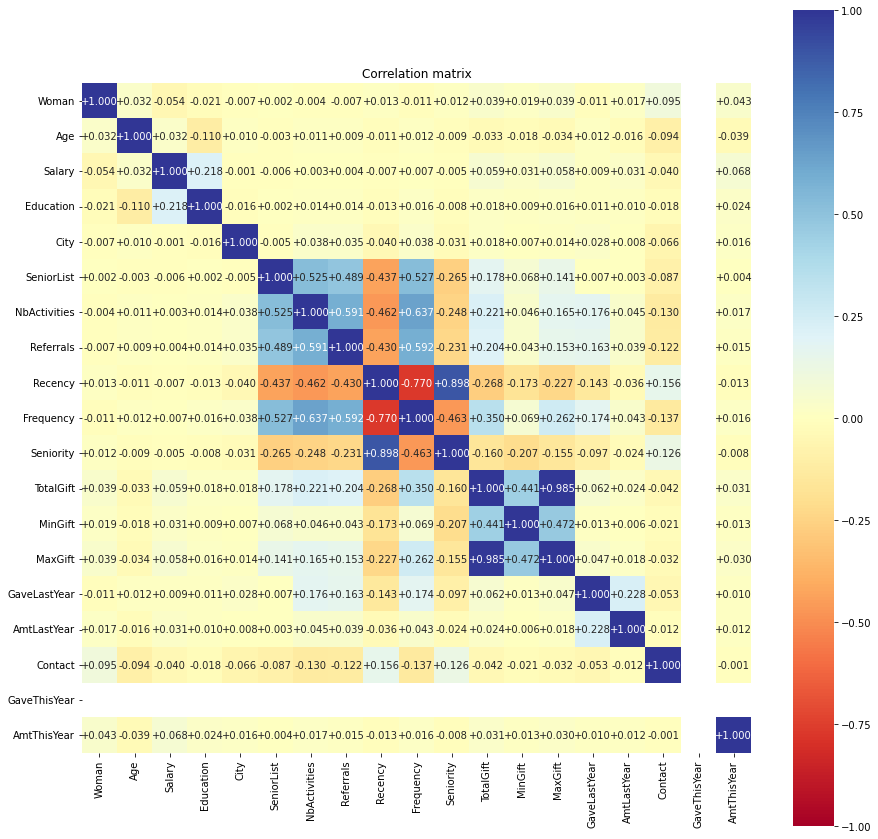

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_new.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix")

## Feature selection

In [ ]:
X = data_new[['Woman', 'Age', 'Salary', 'Education', 'City', 'NbActivities', 'MinGift', 'AmtLastYear', 'Contact']]
Y = data_new["AmtThisYear"]

## Standardization and scaling

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

'''scaler = StandardScaler().fit(X)
X = scaler.transform(X)'''
rscaler = RobustScaler().fit(X)
X = rscaler.transform(X)
minmax = MinMaxScaler().fit(X)
X = minmax.transform(X)

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.5,random_state=5678) # you can change the percentage
train.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
498280,2498281.0,DUGAN,ALICIA,1.0,69.0,25200.0,University / College,Suburban,7.0,2.0,...,1.0,5.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,20.0
859046,2859047.0,ANDERSON,RANDALL,0.0,46.0,54400.0,High School,Rural,9.0,1.0,...,1.0,1.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,30.0
256901,2256902.0,BREAUX,CARL,0.0,49.0,1800.0,High School,Downtown,5.0,2.0,...,1.0,4.0,10.0,10.0,10.0,0.0,0.0,0.0,1.0,10.0
136419,2136420.0,HANS,SHARON,1.0,34.0,26400.0,High School,Suburban,9.0,0.0,...,1.0,5.0,15.0,15.0,15.0,0.0,0.0,0.0,1.0,10.0
305019,2305020.0,MCCALLIE,REGINALD,0.0,29.0,26600.0,High School,City,10.0,2.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,100.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)


## Prebuilt Models
***



> The [sk-learn library]( https://scikit-learn.org/stable/index.html) offers more advanced models. 

### Linear Regression Model

In [ ]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[ 51.16213414  13.54362045 120.78262404 ...  37.6595094   68.71680603
  60.2614866 ]


In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

63.977629882676396
54397.08072509484
233.23181756590338


### Regression Tree Model（Py）

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 51.14299611  27.27249619 139.59760274 ...  52.95749142  47.21358603
  67.88028169]


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

63.45359546478338
54557.807029103526
233.5761268389891


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html


## My Models
***

### **Lineal Regression**

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
regr_predict = regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid, regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, regr_predict)))

63.24436286060311
47657.920748881064
218.30694159572909


### **Regresion Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data

In [ ]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid, DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, DT_predict)))

62.556370193909444
47215.55775490466
217.29141205971453


### **XGBoost**

In [ ]:
import xgboost as xg

xgb_model = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123).fit(X_train, Y_train)
xgb_predict = xgb_model.predict(X_valid)

In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid, xgb_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, xgb_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, xgb_predict)))

50.77398447426993
47775.81808064435
218.57680133226478


## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 
scoring_data_contact["City"].replace(["Rural", "Downtown", "Suburban", "City"], [0, 1, 2, 3], inplace=True)
scoring_data_contact["Education"].replace(["Elementary", "High School", "University / College"], [0, 1, 2], inplace=True)

#scoring_data_contact.head()

X = scoring_data_contact[['Woman', 'Age', 'Salary', 'Education', 'City', 'NbActivities', 'MinGift', 'AmtLastYear', 'Contact']] 

regr_predict_contact=regr.predict(X)

scoring_data_contact['Prediction'] = regr_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

,ID,AmtContact
0,2000001.0,73.877803
1,2000002.0,55.198275
2,2000003.0,66.320303
3,2000004.0,34.310888
4,2000005.0,71.786360


### Predict 'amount given' for members who were not contacted

In [ ]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact["City"].replace(["Rural", "Downtown", "Suburban", "City"], [0, 1, 2, 3], inplace=True)
scoring_data_nocontact["Education"].replace(["Elementary", "High School", "University / College"], [0, 1, 2], inplace=True)

#scoring_data_nocontact.head()

X = scoring_data_nocontact[['Woman', 'Age', 'Salary', 'Education', 'City', 'NbActivities', 'MinGift', 'AmtLastYear', 'Contact']] 

regr_predict_nocontact=regr.predict(X)

scoring_data_nocontact['Prediction'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,AmtNoContact
0,2000001.0,75.022045
1,2000002.0,56.342518
2,2000003.0,67.464546
3,2000004.0,35.455131
4,2000005.0,72.930603


In [ ]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"], how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
0,2000001.0,73.877803,75.022045
1,2000002.0,55.198275,56.342518
2,2000003.0,66.320303,67.464546


## Exporting Results to a CSV File

In [ ]:
path = '/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto/Outputs/'
result_Amt.to_csv(path + 'Round2_Output_amt.csv', index=False)

In [ ]:
# Reminder: You are now done with step 1 of Round 2 on predicting the conditional amount.
# Next, to complete Round2, you need to perform step 2 to predict the probability of giving, calculate the uplift and prepare your decision.

In [ ]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2000001.0,65.41565172857224,70.36563134075104
2000002.0,58.02239763644701,62.972377248625804
2000003.0,67.35718778191847,72.30716739409728
2000004.0,37.733731742296456,42.683711354475264
2000005.0,72.67422014920815,77.62419976138696
2000006.0,31.61555694917946,36.56553656135826
2000007.0,37.76026216815852,42.71024178033733
2000008.0,58.881840764009134,63.831820376187935
2000009.0,37.92037153344358,42.87035114562238
